     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

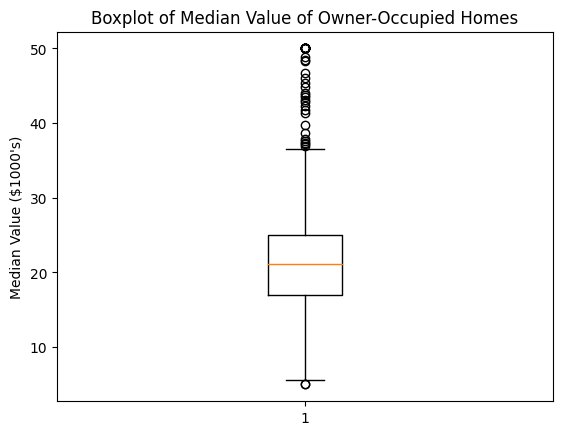

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
print(boston_df)

median_values = boston_df['MEDV']

plt.boxplot(median_values)

plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median Value ($1000's)")

plt.show()


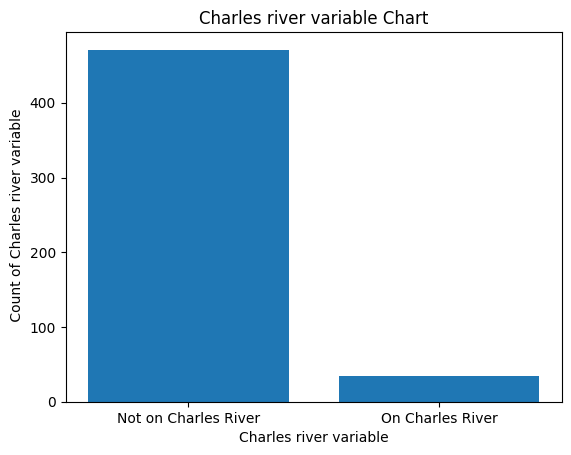

In [28]:
chas_counts = boston_df['CHAS'].value_counts()

plt.bar(chas_counts.index, chas_counts.values)

plt.xticks(chas_counts.index, ['Not on Charles River', 'On Charles River'])
plt.xlabel("Charles river variable")
plt.ylabel(" Count of Charles river variable")
plt.title("Charles river variable Chart")
plt.show()

[Text(0.5, 0, 'Proportion of owner-occupied units built prior to 1940'),
 Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable.')]

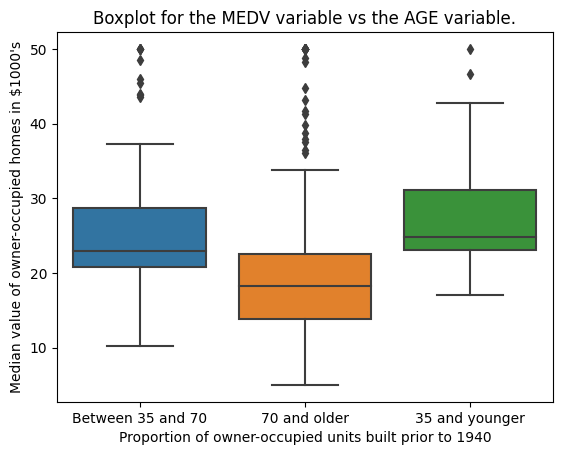

In [30]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"
boxplot = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
boxplot.set(xlabel = "Proportion of owner-occupied units built prior to 1940"
           , ylabel = "Median value of owner-occupied homes in $1000's"
           , title = "Boxplot for the MEDV variable vs the AGE variable.")
     

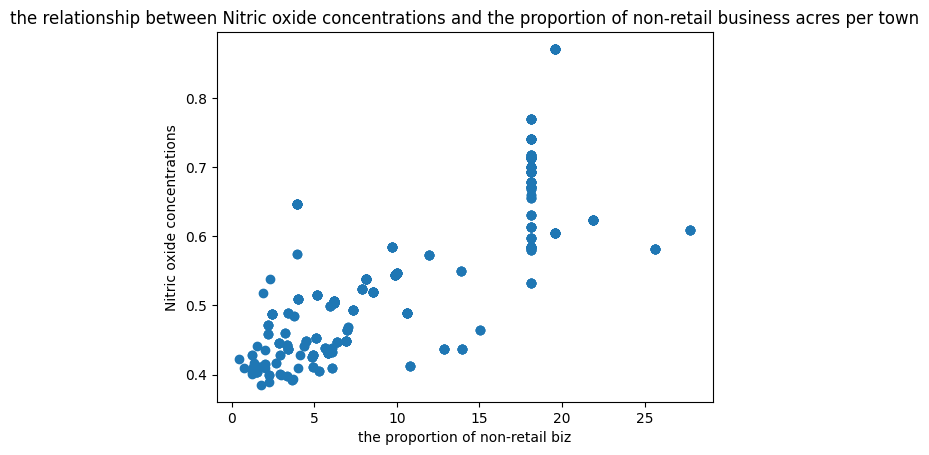

(0.0, 0.8953)

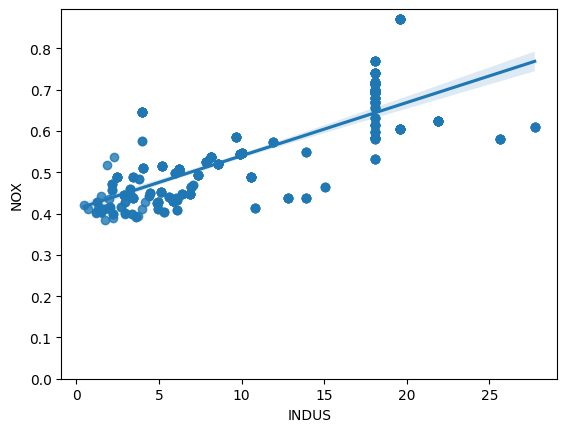

In [31]:
plt.scatter(y = boston_df['NOX'], x = boston_df['INDUS'])
plt.xlabel("the proportion of non-retail biz")
plt.ylabel("Nitric oxide concentrations")
plt.title("the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.show()

sns.regplot(x = "INDUS", y = "NOX", data = boston_df)
plt.ylim(0,)

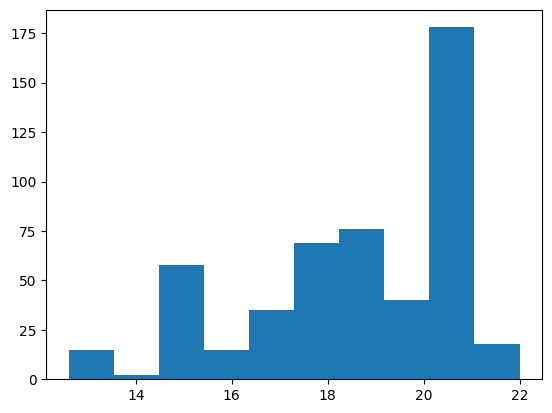

In [27]:
plt.hist(boston_df['PTRATIO'])
plt.show()

In [34]:
#TASK 5
#1-
stats.ttest_ind(boston_df['MEDV'] , boston_df['CHAS'])

TtestResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305, df=1010.0)

In [ ]:
#2-
scipy.stats.levene(boston_df.loc[boston_df['AGE'] <= 30]['MEDV'],
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70)]['MEDV'],
boston_df.loc[(boston_df['AGE'] >= 70)]['MEDV'], center = 'mean')
scipy.stats.f_oneway(boston_df.loc[df['AGE'] <= 30]['MEDV'],
boston_df.loc[(df['AGE'] > 30) & (boston_df['AGE'] < 70)]['MEDV'],
boston_df.loc[(df['AGE'] >= 70)]['MEDV'])

In [ ]:
#3-
scipy.stats.pearsonr(df['NOX'],df['INDUS'])
plt.figure(figsize=(15, 7))
sns.heatmap(boston_df.corr().abs(),  annot=True)

In [41]:
#4-
stats.linregress(boston_df['DIS'], boston_df['MEDV'])
X = boston_df['DIS'].values.reshape(-1,1)
Y = boston_df['MEDV'].values.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Mon, 03 Jul 2023   Prob (F-statistic):                   1.52e-146
Time:                        14:46:44   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""